In [52]:
! cd /home/snlp-project-21/Project

## 1. Data Preparation

In [125]:
from importlib import reload
import preprocess
import os
preprocess= reload(preprocess)

bengali_fullstop= u"\u0964"
files= os.listdir('data/')
for i in files:
    path= 'data/'+i
    file = open(path, encoding='utf-8')
        
    if i== 'bengali_corpus.txt':
        text = file.read()
        pp = preprocess.preprocess_bengali(text)
        train, test= preprocess.train_test_split_data(pp, 0.2)
        #ben_train = open("ben_train.txt", "w")
        fname='ben_train.txt'
        with open(fname, "w", encoding="utf-8") as f:
            for element in train:
                f.write(element + "\n")
        f.close()
        fname='ben_test.txt'
        with open(fname, "w", encoding="utf-8") as f:
            for element in test:
                f.write(element + "\n")
        f.close()

## 2. Subword Segmentation


### 2.2 (For Bengali Lnaguage)

In [1]:
from importlib import reload
import subword
subword = reload(subword)

subword.trainer('ben_train.txt', 1000, 0.995, folder= 'Model/Bengali/')
subword.encode1(path='ben_train.txt', folder= 'Model/Bengali/',  model= 'Model/Bengali/ben_train_seg.model')
subword.decode(path= 'Model/Bengali/ben_train_seg.txt', folder= 'Model/Bengali/', model= 'Model/Bengali/ben_train_seg.model')

#Test Data
subword.trainer('ben_test.txt', 1000, 0.995, folder= 'Model/Bengali/')
subword.encode1(path='ben_test.txt', folder= 'Model/Bengali/',  model= 'Model/Bengali/ben_test_seg.model')
subword.decode(path= 'Model/Bengali/ben_test_seg.txt', folder= 'Model/Bengali/', model= 'Model/Bengali/ben_test_seg.model')


### 2.3 Choosing different vocabulary size

In [118]:
# 1. Characters. This can be done manually but also by running BPE with the output vocabulary size being the same as the input alphabet size.

subword.trainer('ben_train.txt',49 , 0.995, folder= 'Model/Bengali/S1/')
subword.encode1(path='ben_train.txt', folder= 'Model/Bengali/S1/',  model= 'Model/Bengali/S1/ben_train_seg.model')
subword.decode(path= 'Model/Bengali/S1/ben_train_seg.txt', folder= 'Model/Bengali/S1', model= 'Model/Bengali/S1/ben_train_seg.model')

#test data
subword.trainer('ben_test.txt',49 , 0.995, folder= 'Model/Bengali/S1/')
subword.encode1(path='ben_test.txt', folder= 'Model/Bengali/S1/',  model= 'Model/Bengali/S1/ben_test_seg.model')


In [132]:
# 2. Subword Units: smaller vocabulary, closer to characters.

subword.trainer('ben_train.txt', 120 , 0.995, folder= 'Model/Bengali/S2/')
subword.encode1(path='ben_train.txt', folder= 'Model/Bengali/S2/',  model= 'Model/Bengali/S2/ben_train_seg.model')
subword.decode(path= 'Model/Bengali/S2/ben_train_seg.txt', folder= 'Model/Bengali/S2', model= 'Model/Bengali/S2/ben_train_seg.model')

#test data
subword.trainer('ben_test.txt', 120 , 0.995, folder= 'Model/Bengali/S2/')
subword.encode1(path='ben_test.txt', folder= 'Model/Bengali/S2/',  model= 'Model/Bengali/S2/ben_test_seg.model')


In [2]:
# 3. Subword Units: larger vocabulary, closer to words.

subword.trainer('ben_train.txt', 1500 , 0.995, folder= 'Model/Bengali/S3/')
subword.encode1(path='ben_train.txt', folder= 'Model/Bengali/S3/',  model= 'Model/Bengali/S3/ben_train_seg.model')
subword.decode(path= 'Model/Bengali/S3/ben_train_seg.txt', folder= 'Model/Bengali/S3', model= 'Model/Bengali/S3/ben_train_seg.model')

#test data
subword.trainer('ben_test.txt', 1500 , 0.995, folder= 'Model/Bengali/S3/')
subword.encode1(path='ben_test.txt', folder= 'Model/Bengali/S3/',  model= 'Model/Bengali/S3/ben_test_seg.model')

## 3. LM Training

In [128]:
# Training of S1 Model

! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/Bengali/S1/ben_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/Bengali/S1/ben_test_seg.txt \
    -rnnlm Model/Bengali/S1/rnnlm/S1_model\
      -hidden 200 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class 231

debug mode: 2
train file: /home/snlp-project-21/Project/Model/Bengali/S1/ben_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/Bengali/S1/ben_test_seg.txt
class size: 231
Hidden layer size: 200
BPTT: 5
Rand seed: 1
rnnlm file: Model/Bengali/S1/rnnlm/S1_model
Starting training using file /home/snlp-project-21/Project/Model/Bengali/S1/ben_train_seg.txt
Vocab size: 231
Words in train file: 1212425
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 2.9416    Words/sec: 7379.7   VALID entropy: 2.8732
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6489    Words/sec: 7369.8   VALID entropy: 2.7615
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.5596    Words/sec: 7566.4   VALID entropy: 2.7109
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.5103    Words/sec: 7501.1   VALID entropy: 2.6771
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.4795    Words/sec: 7395.8   VALID entropy: 2.6596
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.4586    Words/sec: 7443.7   VALID entropy: 2.6520
Iter:   6	Alph

In [3]:
# Printing Perplexity

f= open('Model/Bengali/S1/rnnlm/baseline_model.output.txt')
r= f.readlines()[23:]
print('Baseline Perplexity is',r)
f= open('Model/Bengali/S1/rnnlm/S1_model.output.txt')
r= f.readlines()[43:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 8.233367\n']
Final Perplexity is ['PPL net: 5.608429\n']


In [4]:
# Training of S2 Model

! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/Bengali/S2/ben_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/Bengali/S2/ben_test_seg.txt \
    -rnnlm Model/Bengali/S2/rnnlm/S2_a_model\
      -hidden 250 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class 290

debug mode: 2
train file: /home/snlp-project-21/Project/Model/Bengali/S2/ben_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/Bengali/S2/ben_test_seg.txt
class size: 290
Hidden layer size: 250
BPTT: 5
Rand seed: 1
rnnlm file: Model/Bengali/S2/rnnlm/S2_a_model
Starting training using file /home/snlp-project-21/Project/Model/Bengali/S2/ben_train_seg.txt
Vocab size: 302
Words in train file: 791618
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 6.6566    Progress: 1.26%   Words/sec: 4607.9 ^C


In [6]:
# Printing Perplexity

f= open('Model/Bengali/S2/rnnlm/Baseline_model.output.txt')
r= f.readlines()[15:]
print('Baseline Perplexity is',r)
f= open('Model/Bengali/S2/rnnlm/S2_model.output.txt')
r= f.readlines()[43:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 28.413481\n']
Final Perplexity is ['PPL net: 20.574960\n']


In [5]:
# Training of S3 Model

! /home/snlp-project-21/rnnlm/rnnlm \
    -train /home/snlp-project-21/Project/Model/Bengali/S3/ben_train_seg.txt \
    -valid /home/snlp-project-21/Project/Model/Bengali/S3/ben_test_seg.txt \
    -rnnlm Model/Bengali/S3/rnnlm/temp_model \
      -hidden 180\
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class 1600

debug mode: 2
train file: /home/snlp-project-21/Project/Model/Bengali/S3/ben_train_seg.txt
valid file: /home/snlp-project-21/Project/Model/Bengali/S3/ben_test_seg.txt
class size: 1650
Hidden layer size: 200
BPTT: 5
Rand seed: 1
rnnlm file: Model/Bengali/S3/rnnlm/Baseline_model
Starting training using file /home/snlp-project-21/Project/Model/Bengali/S3/ben_train_seg.txt
Vocab size: 1682
Words in train file: 392218
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 9.1082    Words/sec: 1324.2   VALID entropy: 8.7389
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 8.1733    Words/sec: 1572.9   VALID entropy: 8.4696
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.7828    Words/sec: 1587.3   VALID entropy: 8.3863
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.5748    Words/sec: 1651.3   VALID entropy: 8.3521
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.4347    Words/sec: 1655.5   VALID entropy: 8.3269
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 7.3251    Words/sec: 1443.4   VALID entropy: 8.3104
Iter:  

In [7]:
# Printing Perplexity

f= open('Model/Bengali/S3/rnnlm/Baseline_model.output.txt')
r= f.readlines()[103:]
print('Baseline Perplexity is',r)
f= open('Model/Bengali/S3/rnnlm/S3_output.txt')
r= f.readlines()[35:]
print('Final Perplexity is',r)

Baseline Perplexity is ['PPL net: 294.617210\n']
Final Perplexity is ['PPL net: 291.305697\n']


## 4. Text Generation

In [144]:
# Text Generation for S1 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/Bengali/S1/rnnlm/S1_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/Bengali/S1/rnnlm/$b

In [145]:
# Text Generation for S2 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/Bengali/S2/rnnlm/S2_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/Bengali/S2/rnnlm/$b

In [7]:
# Text Generation for S3 Model

for i in range(1,8):
    a= 10**i
    b= str(a)+'.txt'
    ! /home/snlp-project-21/rnnlm/rnnlm \
        -rnnlm /home/snlp-project-21/Project/Model/Bengali/S3/rnnlm/S3_model \
            -gen $a \
                - debug 0 > /home/snlp-project-21/Project/Model/Bengali/S3/rnnlm/$b

In [152]:
# Decoding 100.txt for every model 

# For S1 model

subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S1/rnnlm/100.txt', folder= 'Model/Bengali/S1/rnnlm', model= 'Model/Bengali/S1/ben_train_seg.model')

# For S2 model

subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S2/rnnlm/100.txt', folder= 'Model/Bengali/S2/rnnlm', model= 'Model/Bengali/S2/ben_train_seg.model')

# For S3 model

subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S3/rnnlm/100.txt', folder= 'Model/Bengali/S3/rnnlm', model= 'Model/Bengali/S3/ben_train_seg.model')



## 5. OOV Comparision

In [2]:
# 1. For Original Corpora

from importlib import reload
import oov
oov = reload(oov)

t=[]

# Train Corpora

f1= open('Model/Bengali/ben_train_seg_org.txt')
fr1= f1.read()
train= fr1.split()

# Test Corpora

f2= open('Model/Bengali/ben_test_seg_org.txt')
fr2= f2.read()
test= fr2.split()

oov_rate= oov.get_oov_rates(train, test)
print(oov_rate)

0.11921339240893118


{'10_org.txt': 0.11921339240893118, '100_org.txt': 0.11921339240893118, '1000_org.txt': 0.1191915664491346, '10000_org.txt': 0.11910426260994827, '100000_org.txt': 0.11792566078093285, '1000000_org.txt': 0.11179256607809328, '10000000_org.txt': 0.09599057118536787}


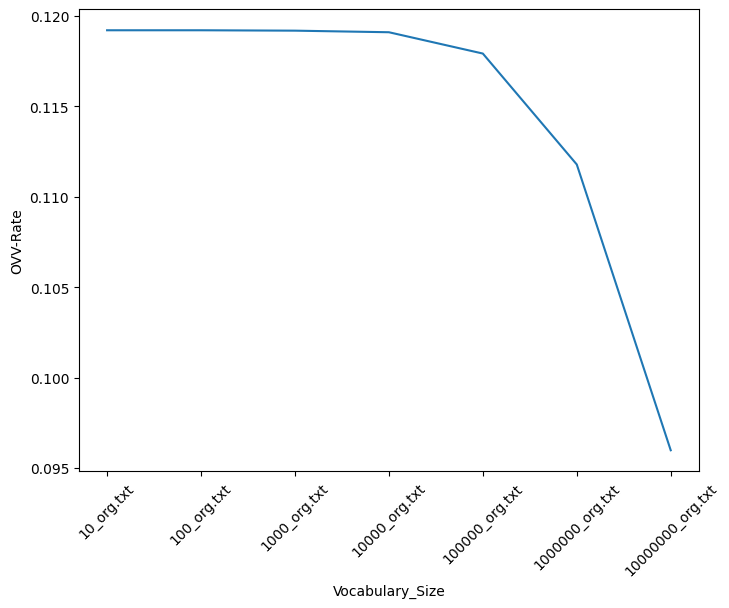

In [8]:
# 2. For S1 Model
oov_s1={}
for i in range(1,8):
    subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S1/rnnlm/{}.txt'.format(10**i), folder= 'Model/Bengali/S1/rnnlm', model= 'Model/Bengali/S1/ben_train_seg.model')
    f= open('Model/Bengali/S1/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s1['{}_org.txt'.format(10**i)]= oov_rate

print(oov_s1)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s1)

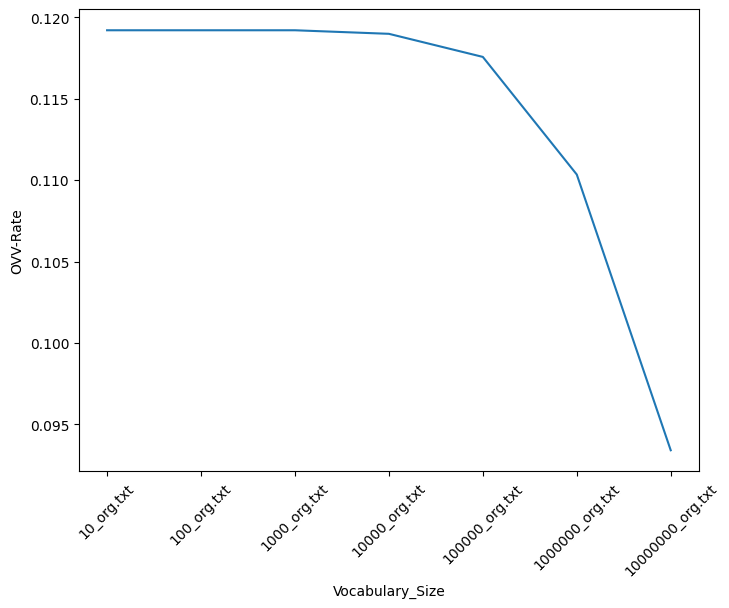

In [3]:
# 2. For S2 Model
oov_s1={}
for i in range(1,8):
    subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S2/rnnlm/{}.txt'.format(10**i), folder= 'Model/Bengali/S2/rnnlm', model= 'Model/Bengali/S2/ben_train_seg.model')
    f= open('Model/Bengali/S2/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s1['{}_org.txt'.format(10**i)]= oov_rate
    
print(oov_s1)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s1)

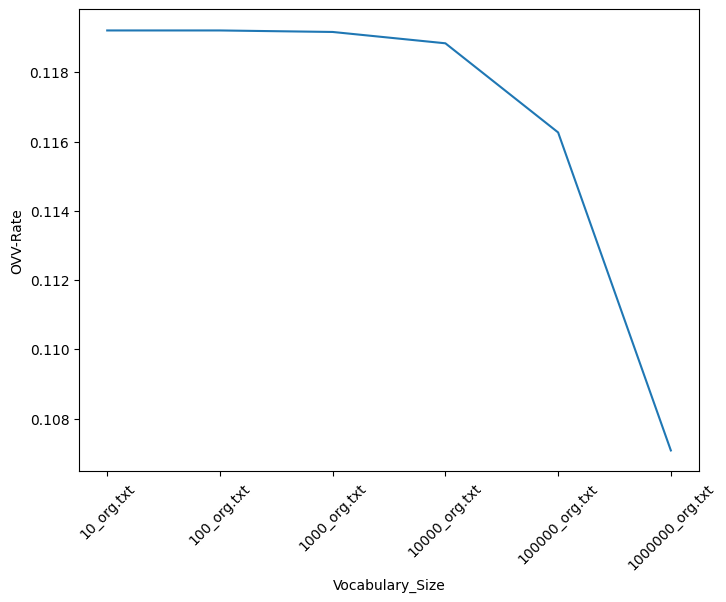

In [7]:
# 3. For S3 Model
oov_s1={}
for i in range(1,7):
    subword.decode(path= '/home/snlp-project-21/Project/Model/Bengali/S3/rnnlm/{}.txt'.format(10**i), folder= 'Model/Bengali/S3/rnnlm', model= 'Model/Bengali/S3/ben_train_seg.model')
    f= open('Model/Bengali/S3/rnnlm/{}_org.txt'.format(10**i))
    r= f.readlines()[2:]
    l= [words for segments in r for words in segments.split()]
    tr= l+train
    oov_rate= oov.get_oov_rates(tr, test)
    oov_s1['{}_org.txt'.format(10**i)]= oov_rate

print(oov_s1)

# Plotting OOV Rates
oov.plot_oov_rates(oov_s1)